C:\Users\david\Python Code
number of drops:5720
merged number of drops:5719


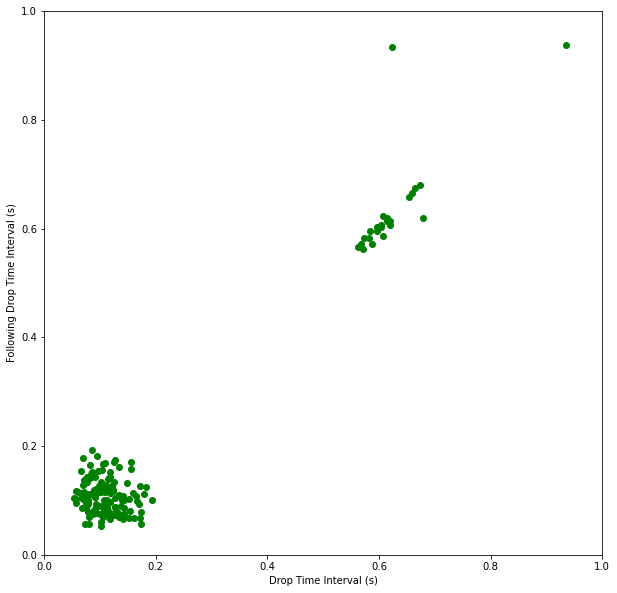

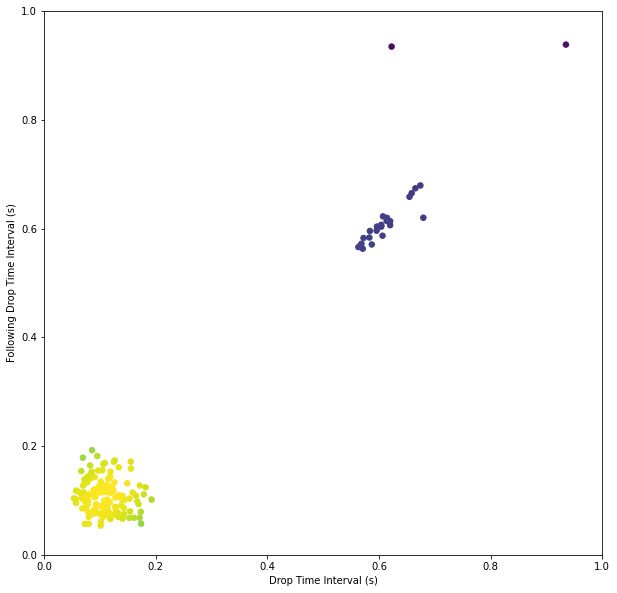

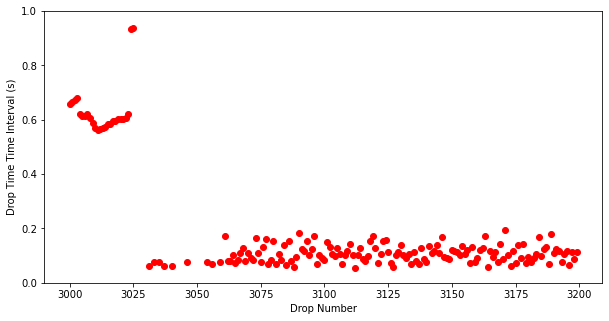

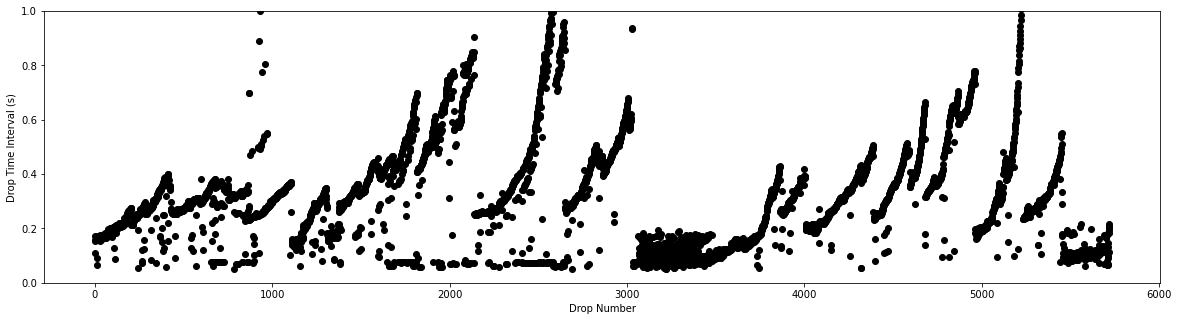

Text(0.5, 0, 'Drop Time Interval (s)')

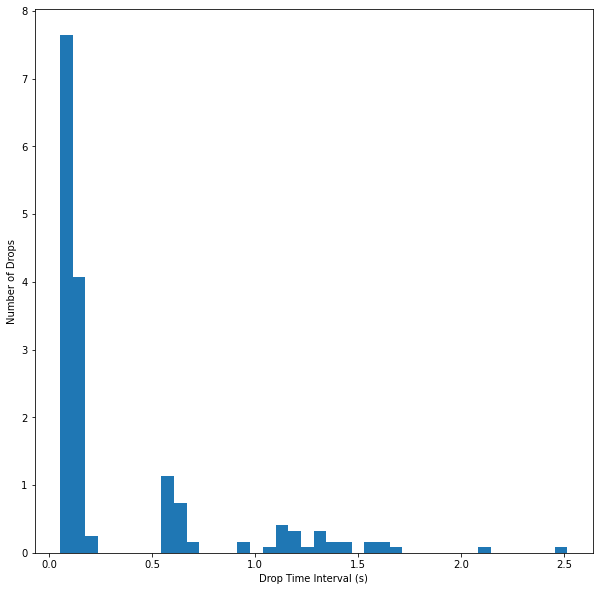

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import gaussian_kde
path = os.getcwd()  #The spreadsheet being read has to be in the same folder as this program
print(path)


file = "03_15-2.csv" #Change file to the name of csv file with data          
data = np.genfromtxt(file,delimiter=',',skip_header = 1)
fakelist = data[:,1]
listx = fakelist.tolist()


min_interval = 0 #sets minimum interval length that won't get merged

x = 0
startpoint = 3000 #Sets where to start graphing data
endpoint = 3200   #Sets where to stop graphing data. If you're denosising, your endpoint has to be lowered than the total number of points after denoising
size = len(listx)
print('number of drops:'+ str(size))
      
while x < size:
    while listx[x] < min_interval and (x + 1) < size:
        y = listx.pop(x)
        listx[x] = listx[x] + y
        size = len(listx)
    x = x + 1

dropn = [range(1,size)]
intervaln = list.copy(listx)
intervaln.pop()
intervaln1 = list.copy(listx)
intervaln1.pop(0)

print('Number of drops after denoising:'+ str(size-1))

x1 = intervaln[startpoint:endpoint]
y1 = intervaln1[startpoint:endpoint]

plt.figure(figsize=(10,10)) #Phase space
plt.plot(intervaln[startpoint:endpoint], intervaln1[startpoint:endpoint], 'o', color='green')
plt.xlabel("Drop Time Interval (s)")
plt.ylabel("Following Drop Time Interval (s)")
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid
plt.show()

xy = np.vstack([x1, y1])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(intervaln[startpoint:endpoint], intervaln1[startpoint:endpoint], c=z, s=30)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Drop Time Interval (s)")
plt.ylabel("Following Drop Time Interval (s)")
plt.show()

plt.figure(figsize=(10,5)) #Local graph
#plt.plot(range(1,size),intervaln1[: endpoint], 'o', color='red')
plt.plot(range(startpoint,endpoint),intervaln1[startpoint:endpoint], 'o', color='red')
plt.xlabel("Drop Number")
plt.ylabel("Drop Time Time Interval (s)")
plt.ylim([0,1])
plt.show()

plt.figure(figsize=(20,5)) #lifetime graph
plt.plot(range(1,size), intervaln, 'o', color='black')
plt.xlabel('Drop Number')
plt.ylabel('Drop Time Interval (s)')
plt.ylim([0,1])
plt.show()

plt.figure(figsize=(10,10))
plt.hist(intervaln[startpoint:endpoint], density=True, bins=40)  # Histogram
plt.ylabel('Number of Drops')
plt.xlabel('Drop Time Interval (s)')

# Calculate the point density

